In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
import numpy as np
import math

In [2]:
def qb_to_coord(v0, v1):
    theta = np.arccos(v0)*2
    phi = np.angle(v1/np.sin(theta/2))
    return [1, float(theta), phi]



In [3]:
PI = np.pi
n5 = 4
n6 = 5
n7 = 0

In [4]:
t0 = (2/3)*(n5+1)
t1 = (3/4)*(n6+1)*np.exp(1j*2*(n7+1)*PI/11)
target = np.array([t0,t1])
norm = np.linalg.norm(target)
target_n = target/norm
coord = qb_to_coord(target_n[0], target_n[1])
print(target_n)
print(coord)


[0.59522755+0.j         0.67599533+0.43443582j]
[1, 1.866495057312408, 0.5711986642890532]


/tmp/ipykernel_11915/2320921079.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  return [1, float(theta), phi]


In [5]:
#plot_bloch_vector(coord, coord_type = "spherical")

In [6]:
from qiskit import Aer, QuantumCircuit

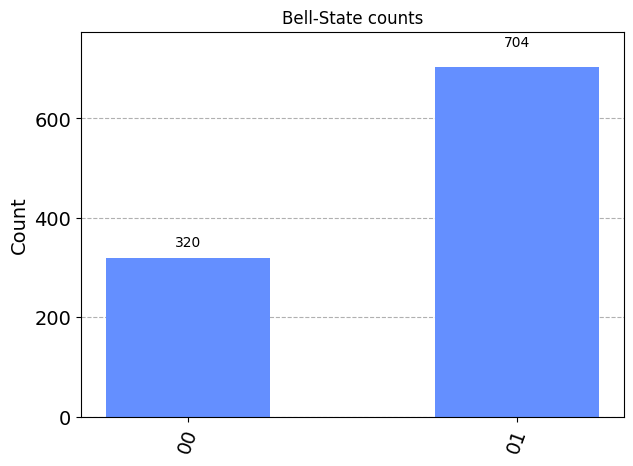

In [7]:
circ = QuantumCircuit(2)
circ.rx(coord[1], 0)
circ.rz(coord[2], 0)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')